# Regression- Supervised Machine Learning
## Automobile Price Prediction -MySQL Workbench

## Dataset Description
This dataset contains the latest information on car prices in Australia for the year 2023. It covers various brands, models, types, and features of cars sold in the Australian market. It provides useful insights into the trends and factors influencing the car prices in Australia. The dataset includes information such as brand, year, model, car/suv, title, used/new, transmission, engine, drive type, fuel type, fuel consumption, kilometres, colour (exterior/interior), location, cylinders in engine, body type, doors, seats, and price. The dataset has over 16,000 records of car listings from various online platforms in Australia.

## Features Description
1. Brand: Name of the car manufacturer
2. Year: Year of manufacture or release
3. Model: Name or code of the car model
4. Car/Suv: Type of the car (car or suv)
5. Title: Title or description of the car
6. UsedOrNew: Condition of the car (used or new)
7. Transmission: Type of transmission (manual or automatic)
8. Engine: Engine capacity or power (in litres or kilowatts)
9. DriveType: Type of drive (front-wheel, rear-wheel, or all-wheel)
10. FuelType: Type of fuel (petrol, diesel, hybrid, or electric)
11. FuelConsumption: Fuel consumption rate (in litres per 100 km)
12. Kilometres: Distance travelled by the car (in kilometres)
13. ColourExtInt: Colour of the car (exterior and interior)
14. Location: Location of the car (city and state)
15. CylindersinEngine: Number of cylinders in the engine
16. BodyType: Shape or style of the car body (sedan, hatchback, coupe, etc.)
17. Doors: Number of doors in the car
18. Seats: Number of seats in the car
19. Price: Price of the car (in Australian dollars)

## Potential Use Cases
1. Price prediction: Predict the price of a car based on its features and location using machine learning models.
2. Market analysis: Explore the market trends and demand for different types of cars in Australia using descriptive statistics and visualization techniques.
3. Feature analysis: Identify the most important features that affect the car prices and how they vary across different brands, models, and locations using correlation and regression analysis.

## Aim or Objective
This notebook aims to engage in Exploratory Data Analysis (EDA) and preprocessing while contemplating a hypothetical scenario. The primary objective is to pinpoint the single variable, among the various ones present, that significantly influences the ultimate values of cars in our dataset.

To attain this objective, a comprehensive analysis of the dataset will be conducted, involving exploratory data analysis techniques and preprocessing steps. Importantly, we will be fetching data from MySQL Workbench, establishing a connection to our dataset. By meticulously scrutinizing the relationships between different variables and their effects on the final car values, we can discern the pivotal variable that plays a crucial role in determining the prices of the cars.

This analytical process encompasses the examination of statistical measures, visualization of data distributions, and potentially the utilization of machine learning models to identify the most influential factor affecting car values.

Throughout the notebook, we will uphold a professional and clear presentation, ensuring that the analysis is not only thorough but also easily comprehensible. Let's proceed with the exploration and analysis to identify the critical variable impacting car values.

## Agenda
1. Importing Dependencies
2. Importing data from .csv file
3. Data Preprocessing
4. Handling Missing Values
5. Importing Data from MySQL Workbentch to Python
6. Data Preprocessing - Exploratory Data Analysis (EDA)
7. Data Transformation
8. Data Mining - Univariate, Bivariate & Multivariate Analysis
9. Feature Importance with AdaBoost
10. Model Training
11. R square and adjusted R square¶
12. Model Building & Predictions¶
13. Hyper-parameter Tunning the Models
14. Pickling The Model file For Deployment

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mysql.connector as mysql

## Importing Data from .csv file

In [2]:
data = pd.read_csv('Car Price Data.csv')

In [3]:
data.sample(5)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
13642,LDV,2016.0,G10,Commercial,2016 LDV G10,USED,Automatic,"4 cyl, 2 L",Rear,Unleaded,11.7 L / 100 km,67364,Gold / Beige,"Winnellie, NT",4 cyl,Commercial,4 Doors,2 Seats,18990
2386,Nissan,2019.0,Navara,Ute / Tray,2019 Nissan Navara ST (4X2),USED,Automatic,"4 cyl, 2.3 L",Front,Diesel,6.8 L / 100 km,190812,White / -,"Blacktown, NSW",4 cyl,Ute / Tray,4 Doors,5 Seats,27888
11749,Audi,2023.0,A1,AUDI MORNINGTON,2023 Audi A1 35 Tfsi,DEMO,Automatic,"4 cyl, 1.5 L",Front,Premium,5.8 L / 100 km,1395,Red / Silver And Black Silk Nappa,"Mornington, VIC",4 cyl,Hatchback,5 Doors,5 Seats,54990
13046,Hyundai,2019.0,Tucson,SUV,2019 Hyundai Tucson Active X (2WD) Black INT,USED,Automatic,"4 cyl, 2 L",Front,Unleaded,7.9 L / 100 km,57081,White / Grey,"Thebarton, SA",4 cyl,SUV,4 Doors,5 Seats,28888
3841,Nissan,2023.0,Qashqai,SUV,2023 Nissan Qashqai ST-L 2-Tone,USED,Automatic,"4 cyl, 1.3 L",Front,Premium,6.1 L / 100 km,5107,Blue / -,"Cannington, WA",4 cyl,SUV,4 Doors,5 Seats,43555


### Data Preprocessing

In [4]:
data.shape

(16734, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

### Checking number of unique values for each feature

In [6]:
data[data.columns].nunique()

Brand                   76
Year                    45
Model                  781
Car/Suv                618
Title                 8804
UsedOrNew                3
Transmission             3
Engine                 106
DriveType                5
FuelType                 9
FuelConsumption        157
Kilometres           14262
ColourExtInt           834
Location               618
CylindersinEngine       11
BodyType                10
Doors                   13
Seats                   13
Price                 3794
dtype: int64

### Checking for Null Values

In [7]:
data.isnull().any() 

Brand                True
Year                 True
Model                True
Car/Suv              True
Title                True
UsedOrNew            True
Transmission         True
Engine               True
DriveType            True
FuelType             True
FuelConsumption      True
Kilometres           True
ColourExtInt         True
Location             True
CylindersinEngine    True
BodyType             True
Doors                True
Seats                True
Price                True
dtype: bool

In [8]:
data.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

##### Observation:
We can clearly see there is some amount of null data present in our dataset.

### Converting Data Types

In [9]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce') 
data['Kilometres'] = pd.to_numeric(data['Kilometres'], errors='coerce')

data['Price'] = data['Price'].astype(float).astype('float64')
data['Kilometres'] = data['Kilometres'].astype(float).astype('float64')

In [10]:
## Doors and Seats
data['Seats'] = data['Seats'].str.extract('(\d+)').astype(float).astype('Int64')
data['Doors'] = data['Doors'].str.extract('(\d+)').astype(float).astype('Int64')
data['CylindersinEngine'] = data['CylindersinEngine'].str.extract('(\d+)').astype(float).astype('float64')

In [11]:
## FuelConsumption
data = data.rename(columns={'FuelConsumption': 'FuelConsump_per_100km'})
data['FuelConsump_per_100km'] = data['FuelConsump_per_100km'].str.extract('(\d+)').astype(float).astype('float64')

In [12]:
## Engine
mask = data['Engine'].astype(str).str.contains('4 cyl, 2.2 L', na=False)
data = data[mask]
data['Engine'] = data['Engine'].str.extract('(\d+)').astype(float).astype('float')

In [13]:
## Year
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

In [14]:
catvars = data.select_dtypes(include=['object']).columns
numvars = data.select_dtypes(include = ['int32', 'int64', 'float32', 'float64']).columns

In [15]:
catvars.to_list()

['Brand',
 'Model',
 'Car/Suv',
 'Title',
 'UsedOrNew',
 'Transmission',
 'DriveType',
 'FuelType',
 'ColourExtInt',
 'Location',
 'BodyType',
 'Doors',
 'Seats']

In [16]:
numvars.to_list()

['Engine', 'FuelConsump_per_100km', 'Kilometres', 'CylindersinEngine', 'Price']

In [17]:
data.drop('Year', axis=1).describe(exclude=['object'])

,Engine,FuelConsump_per_100km,Kilometres,CylindersinEngine,Price
count,516.0,516.000000,506.000000,516.0,515.000000
mean,4.0,6.943798,108214.430830,4.0,32212.328155
std,0.0,1.078807,71655.615792,0.0,15623.866675
min,4.0,0.000000,4.000000,4.0,2500.000000
25%,4.0,6.000000,59035.750000,4.0,19990.000000
50%,4.0,7.000000,101233.000000,4.0,29990.000000
75%,4.0,8.000000,158828.500000,4.0,39994.000000
max,4.0,12.000000,343770.000000,4.0,88225.000000


In [18]:
percentage_nulls = np.round((data.isnull().sum()/len(data)*100).sort_values(ascending=False))
percentage_nulls = percentage_nulls[percentage_nulls != 0]
percentage_nulls

Kilometres    2.0
Location      2.0
dtype: float64

### Handling Missing Values

In [19]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce') 
data['Kilometres'] = pd.to_numeric(data['Kilometres'], errors='coerce') 

data['Price'] = data['Price'].astype(float).astype('float64')
data['Kilometres'] = data['Kilometres'].astype(float).astype('float64')

In [20]:
#### Missing Values

mode_seats = data['Seats'].mode()
data['Seats'].fillna(mode_seats, inplace=True)

mode_door = data['Doors'].mode()
data['Doors'].fillna(mode_door, inplace=True)

data = data.drop('Location', axis=1)

mode_body = data['BodyType'].mode()
data['BodyType'].fillna(mode_body, inplace=True)

mean_k = float(data['Kilometres'].mean())
data['Kilometres'].fillna(mean_k, inplace=True)

mean_price = float(data['Price'].mean())
data['Price'].fillna(mean_price, inplace=True)


In [21]:
data.isnull().sum()

Brand                    0
Year                     0
Model                    0
Car/Suv                  0
Title                    0
UsedOrNew                0
Transmission             0
Engine                   0
DriveType                0
FuelType                 0
FuelConsump_per_100km    0
Kilometres               0
ColourExtInt             0
CylindersinEngine        0
BodyType                 0
Doors                    0
Seats                    0
Price                    0
dtype: int64

##### Observation:
So finally we have handled all the null values.

In [22]:
data.duplicated().sum()

0

##### Observation:
There are no duplicates in the dataset.

# 1. Importing Data from MySQL Workbentch to Python

In [23]:
import pandas as pd
import mysql.connector as mysql

# Connect to the MySQL database
db = mysql.connect(
    host="localhost",
    user="root",
    password="12345",
    database="Car"
)

# Create a cursor
cursor = db.cursor()

# Replace 'your_table_name' with your actual table name
table_name = 'car price data'

# Execute a SELECT query to retrieve the entire data from the table
query = f"SELECT * FROM `{table_name}`"
cursor.execute(query)

# Fetch all the rows from the last executed statement
table_data = cursor.fetchall()

# Get column names from the cursor description
columns = [i[0] for i in cursor.description]

# Create a Pandas DataFrame
df = pd.DataFrame(table_data, columns=columns)


In [24]:
# Display the DataFrame
df.sample(5)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
13231,Mitsubishi,2017,Lancer,Sedan,2017 Mitsubishi Lancer ES Sport,USED,Automatic,"4 cyl, 2 L",Front,Unleaded,7.4 L / 100 km,45477,White / Black,"Stuart Park, NT",4 cyl,Sedan,4 Doors,5 Seats,20980
2793,Volkswagen,2022,T-ROC,Liverpool Volkswagen New Cars,2022 Volkswagen T-ROC 140TSI R-Line,DEMO,Automatic,"4 cyl, 2 L",AWD,Premium,7.3 L / 100 km,21,Black / -,"Liverpool, NSW",4 cyl,SUV,4 Doors,5 Seats,53990
2792,Ford,2007,Territory,SUV,2007 Ford Territory TS (rwd),USED,Automatic,"6 cyl, 4 L",Rear,Unleaded,12.8 L / 100 km,209499,Black / -,"Capalaba, QLD",6 cyl,SUV,4 Doors,5 Seats,10990
14463,Hyundai,2012,I20,Easy Wholesale,2012 Hyundai I20 PB Active Hatchback 5dr Auto ...,USED,Automatic,-,Front,Unleaded,-,110695,Red / -,"Wangara, WA",-,Hatchback,,,11999
5215,Suzuki,2016,Grand,SUV,2016 Suzuki Grand Vitara Navigator (4X4),USED,Manual,"4 cyl, 2.4 L",4WD,Unleaded,8.8 L / 100 km,70463,White / Grey,"Singleton, NSW",4 cyl,SUV,2 Doors,4 Seats,27990


## 2. Data Preprocessing - Exploratory Data Analysis (EDA)

In [25]:
df.shape

(16106, 19)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16106 entries, 0 to 16105
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Brand              16106 non-null  object
 1   Year               16106 non-null  int64 
 2   Model              16106 non-null  object
 3   Car/Suv            16106 non-null  object
 4   Title              16106 non-null  object
 5   UsedOrNew          16106 non-null  object
 6   Transmission       16106 non-null  object
 7   Engine             16106 non-null  object
 8   DriveType          16106 non-null  object
 9   FuelType           16106 non-null  object
 10  FuelConsumption    16106 non-null  object
 11  Kilometres         16106 non-null  int64 
 12  ColourExtInt       16106 non-null  object
 13  Location           16106 non-null  object
 14  CylindersinEngine  16106 non-null  object
 15  BodyType           16106 non-null  object
 16  Doors              16106 non-null  objec

In [27]:
df.isnull().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

##### Observation:
One thing to be noted here is, when we have imported data from csv file there were some null values, while when we imported from MySQL workbentch there are no null values. It means that, SQL by-default filters out the null values.

### Converting Data Types

In [28]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # trocar valores estranho por NA
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce') # trocar valores estranho por NA

df['Price'] = df['Price'].astype(float).astype('float64')
df['Kilometres'] = df['Kilometres'].astype(float).astype('float64')

In [29]:
## Doors and Seats
df['Seats'] = df['Seats'].str.extract('(\d+)').astype(float).astype('Int64')
df['Doors'] = df['Doors'].str.extract('(\d+)').astype(float).astype('Int64')
df['CylindersinEngine'] = df['CylindersinEngine'].str.extract('(\d+)').astype(float).astype('float64')

In [30]:
## FuelConsumption
df = df.rename(columns={'FuelConsumption': 'FuelConsump_per_100km'})
df['FuelConsump_per_100km'] = df['FuelConsump_per_100km'].str.extract('(\d+)').astype(float).astype('float64')

In [31]:
## Engine
mask = df['Engine'].astype(str).str.contains('4 cyl, 2.2 L', na=False)
df = df[mask]
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(float).astype('float')

In [32]:
## Year
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [33]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32', 'int64', 'float32', 'float64']).columns

In [34]:
catvars.to_list()

['Brand',
 'Model',
 'Car/Suv',
 'Title',
 'UsedOrNew',
 'Transmission',
 'DriveType',
 'FuelType',
 'ColourExtInt',
 'Location',
 'BodyType',
 'Doors',
 'Seats']

In [35]:
numvars.to_list()

['Engine', 'FuelConsump_per_100km', 'Kilometres', 'CylindersinEngine', 'Price']

In [36]:
df.drop('Year', axis=1).describe(exclude=['object'])

,Engine,FuelConsump_per_100km,Kilometres,CylindersinEngine,Price
count,505.0,505.000000,505.000000,505.0,505.000000
mean,4.0,6.948515,108428.673267,4.0,31889.770297
std,0.0,1.035732,71564.260891,0.0,15496.353999
min,4.0,0.000000,4.000000,4.0,2500.000000
25%,4.0,6.000000,59158.000000,4.0,19990.000000
50%,4.0,7.000000,101470.000000,4.0,29990.000000
75%,4.0,8.000000,158907.000000,4.0,39990.000000
max,4.0,12.000000,343770.000000,4.0,88225.000000


In [37]:
percentage_nulls = np.round((df.isnull().sum()/len(df)*100).sort_values(ascending=False))
percentage_nulls = percentage_nulls[percentage_nulls != 0]
percentage_nulls

Series([], dtype: float64)

## 3. Data Transformation

In [38]:
df.sample(3)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsump_per_100km,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
400,Ford,2020-01-01,Ranger,Ute / Tray,2020 Ford Ranger XL 2.2 (4X4),USED,Automatic,4.0,4WD,Diesel,8.0,79801.0,White / Black,"Caringbah, NSW",4.0,Ute / Tray,4,5,46990.0
1248,Hyundai,2012-01-01,Santa,SUV,2012 Hyundai Santa FE Trail Crdi (4X4),USED,Automatic,4.0,4WD,Diesel,7.0,139524.0,White / -,"Minchinbury, NSW",4.0,SUV,4,7,21990.0
5438,Mazda,2017-01-01,CX-5,SUV,2017 Mazda CX-5 GT (4X4),USED,Automatic,4.0,AWD,Diesel,6.0,148815.0,Grey / Black,"Goulburn, NSW",4.0,SUV,4,5,24970.0


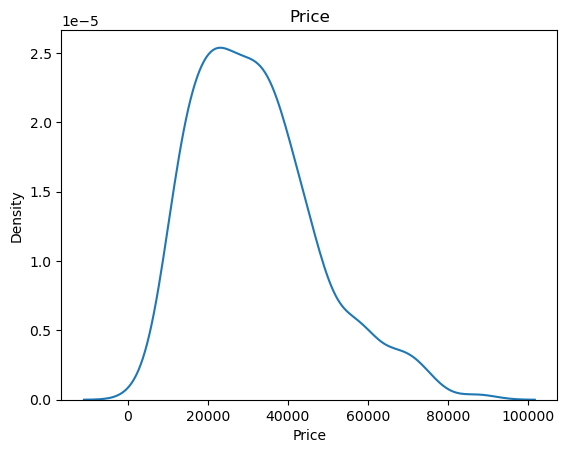

In [39]:
sns.kdeplot(data=df, x='Price')
plt.title("Price")
plt.show()

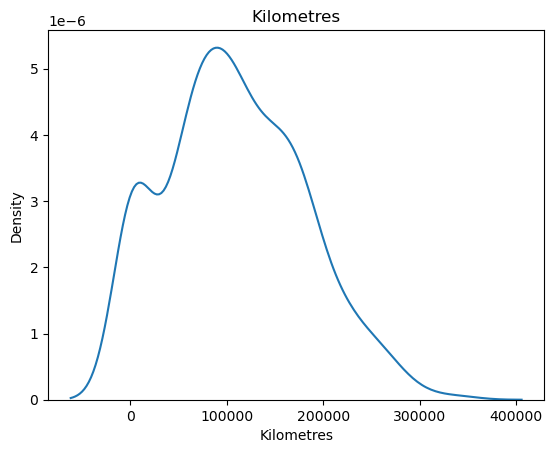

In [40]:
sns.kdeplot(data=df, x='Kilometres')
plt.title("Kilometres")
plt.show()

In [41]:
df['Price'] = np.log(df['Price'])
df['Kilometres'] = np.log(df['Kilometres'])

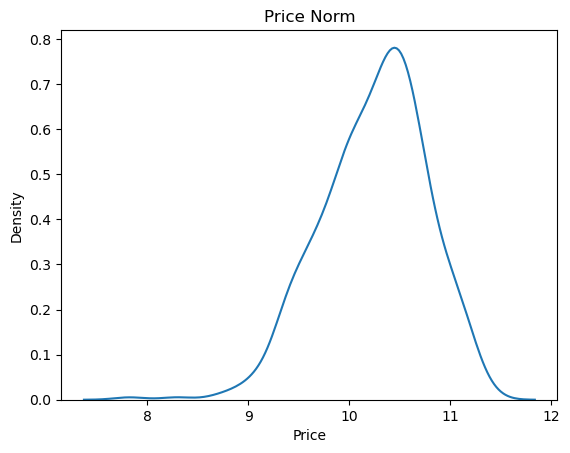

In [42]:
sns.kdeplot(data=df, x='Price')
plt.title("Price Norm");

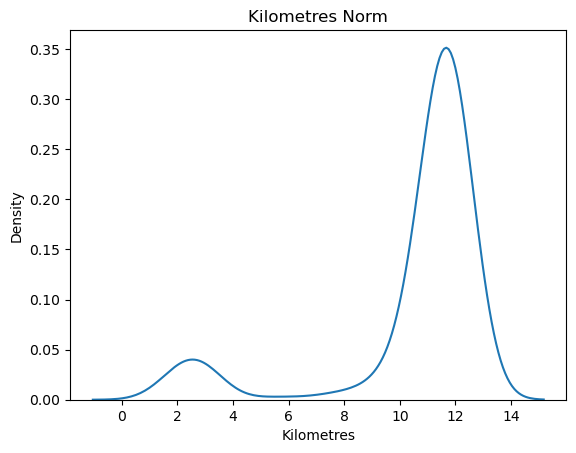

In [43]:
sns.kdeplot(data=df, x='Kilometres')
plt.title("Kilometres Norm");

## 4. Data Mining - Univariate, Bivariate & Multivariate Analysis

### Univariate Analysis

In [44]:
df.sample(4)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsump_per_100km,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
7412,Hyundai,2016-01-01,Santa,SUV,2016 Hyundai Santa FE Highlander Crdi (4X4),USED,Automatic,4.0,AWD,Diesel,7.0,11.385365,White / Black Leather,"Berwick, VIC",4.0,SUV,4,7,10.433763
544,Holden,2018-01-01,Captiva,SUV,2018 Holden Captiva 7 LTZ (awd),USED,Automatic,4.0,AWD,Diesel,8.0,12.119305,Red / -,"Elderslie, NSW",4.0,SUV,4,7,9.740910
7425,Mazda,2017-01-01,BT-50,Ute / Tray,2017 Mazda BT-50 XT (4X2),USED,Manual,4.0,Rear,Diesel,7.0,12.115327,White / -,"Bayswater, VIC",4.0,Ute / Tray,2,3,9.740910
8478,Kia,2019-01-01,Carnival,Wagon,2019 Kia Carnival S,USED,Automatic,4.0,Front,Diesel,7.0,10.749055,White / Beige,"SOUTH MELBOURNE, VIC",4.0,Wagon,4,8,10.568235


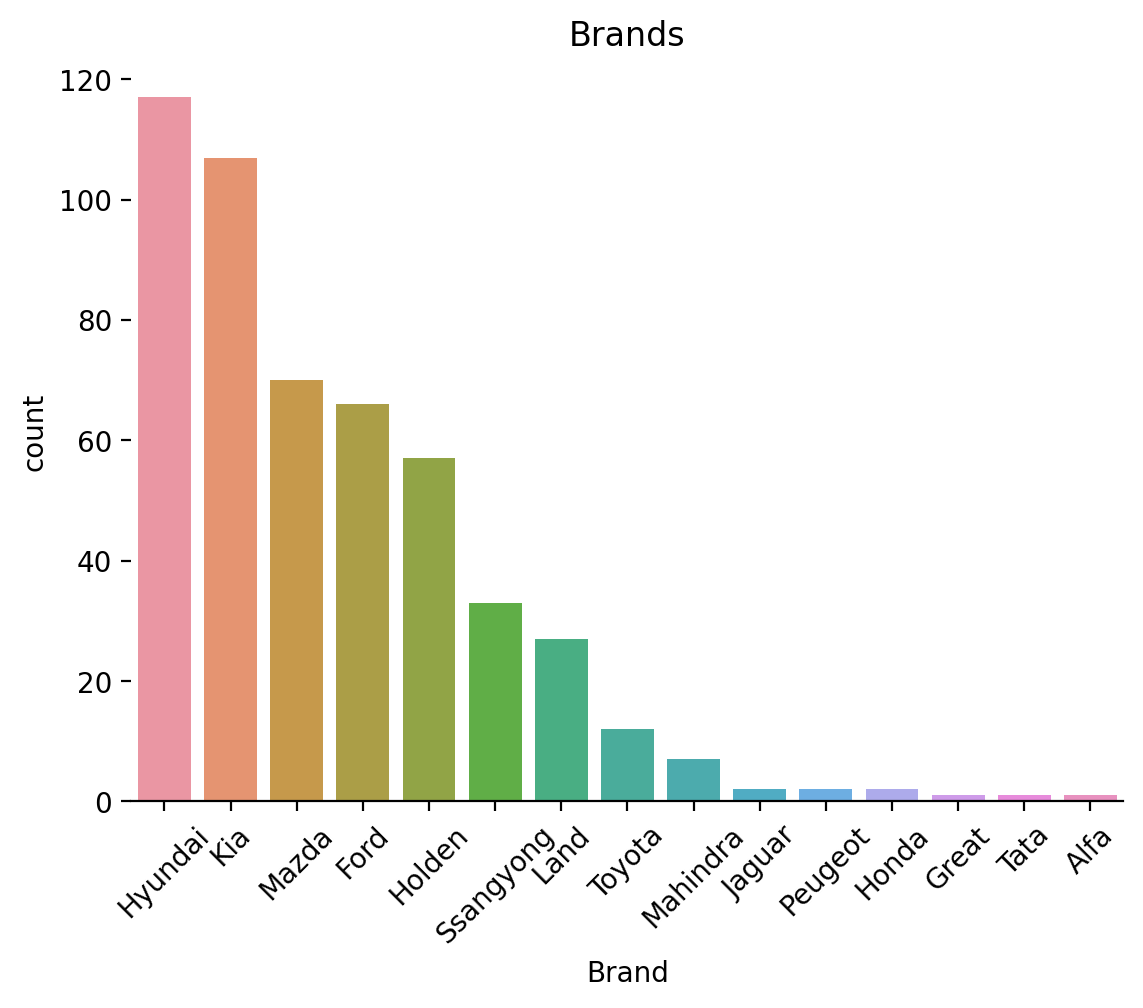

In [45]:
#Frequency of Brands

plt.figure(dpi=200)
sns.countplot(data=df,x='Brand', 
              order=df['Brand'].value_counts().index);

sns.despine(left=True)
plt.title("Brands")
plt.xticks(rotation=45);

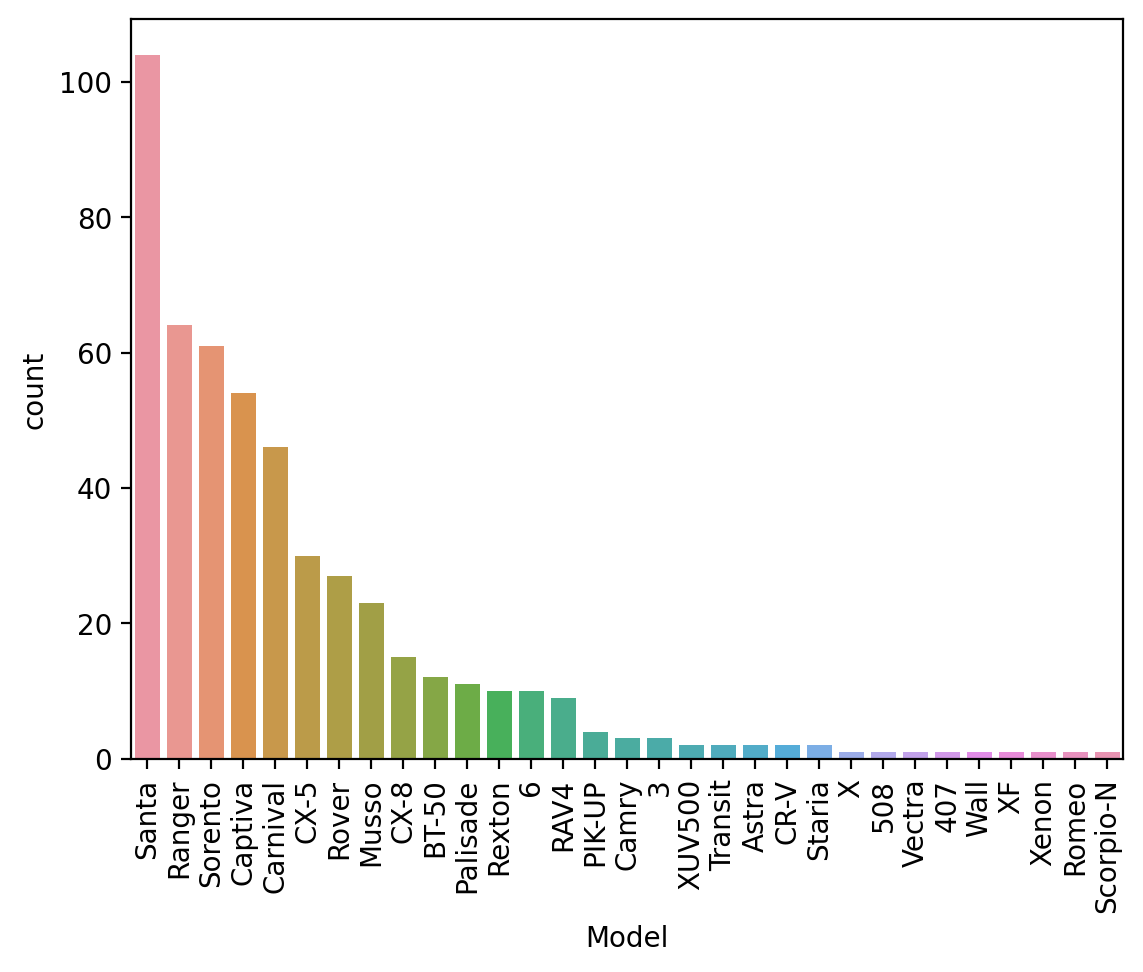

In [46]:
#Frequency of Models

plt.figure(dpi=200)
sns.countplot(data=df,x='Model', 
              order=df['Model'].value_counts().index)

plt.xticks(rotation=90);

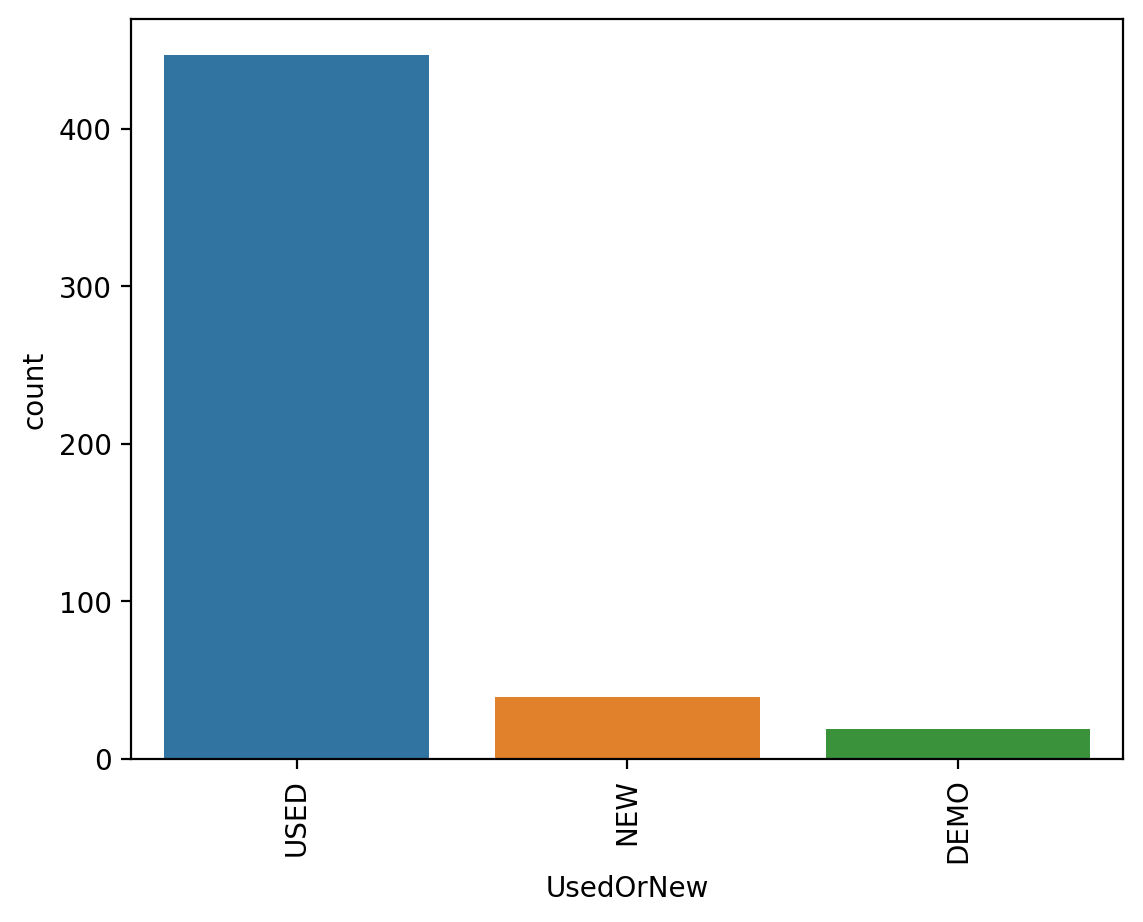

In [47]:
plt.figure(dpi=200)
sns.countplot(data=df,x='UsedOrNew', 
              order=df['UsedOrNew'].value_counts().index)

plt.xticks(rotation=90);

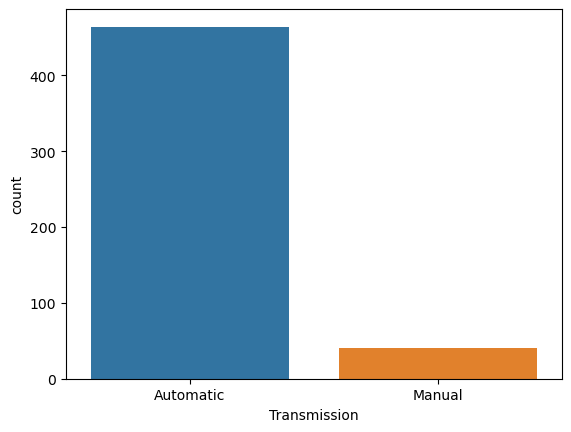

In [48]:
sns.countplot(data=df,x='Transmission', 
              order=df['Transmission'].value_counts().index);

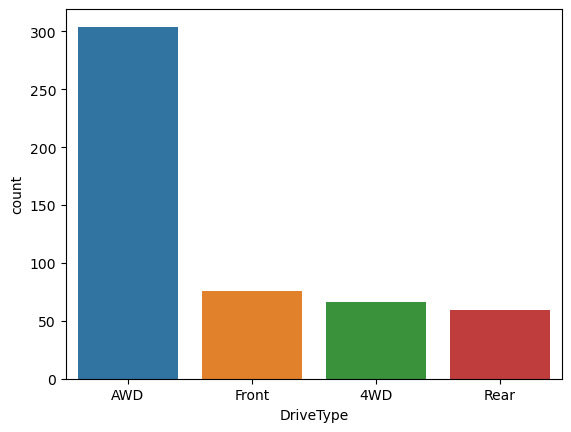

In [49]:
sns.countplot(data=df,x='DriveType', 
              order=df['DriveType'].value_counts().index);

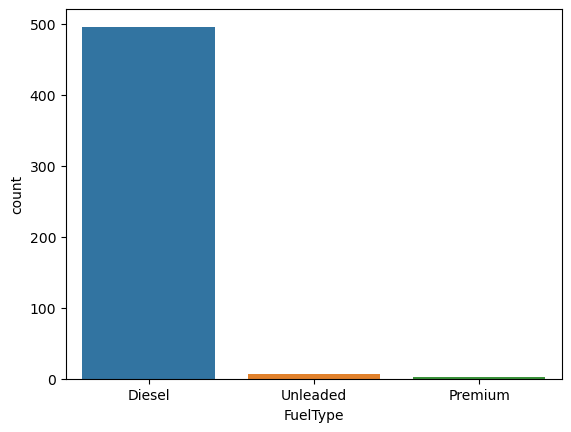

In [50]:
sns.countplot(data=df,x='FuelType', 
              order=df['FuelType'].value_counts().index);

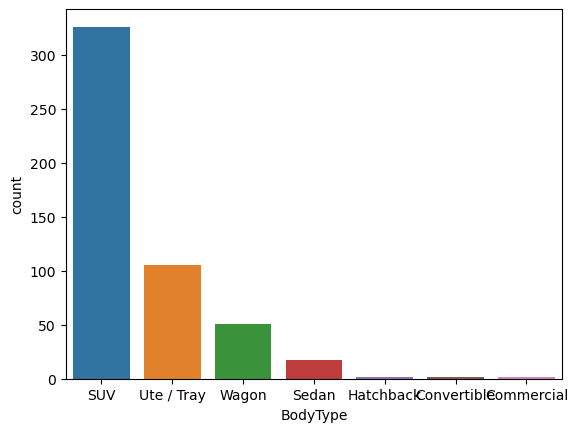

In [51]:
sns.countplot(data=df,x='BodyType', 
              order=df['BodyType'].value_counts().index);

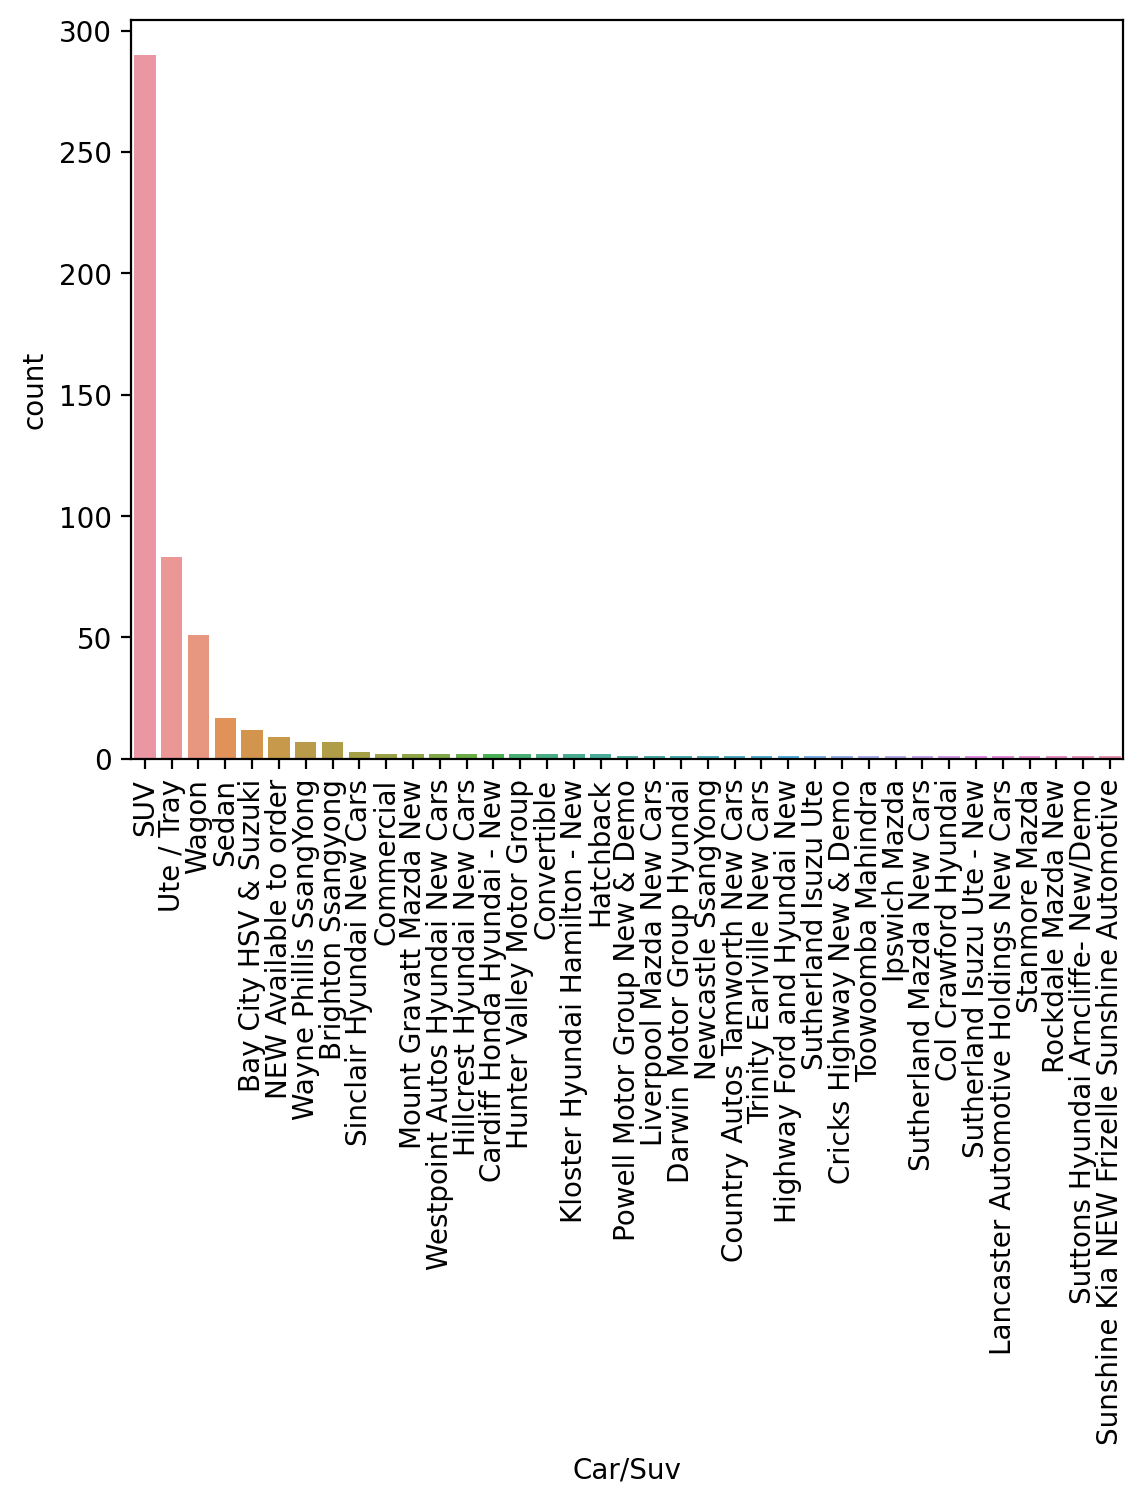

In [52]:
plt.figure(dpi=200)
sns.countplot(data=data,x='Car/Suv', 
              order=data['Car/Suv'].value_counts().index);

plt.xticks(rotation=90);

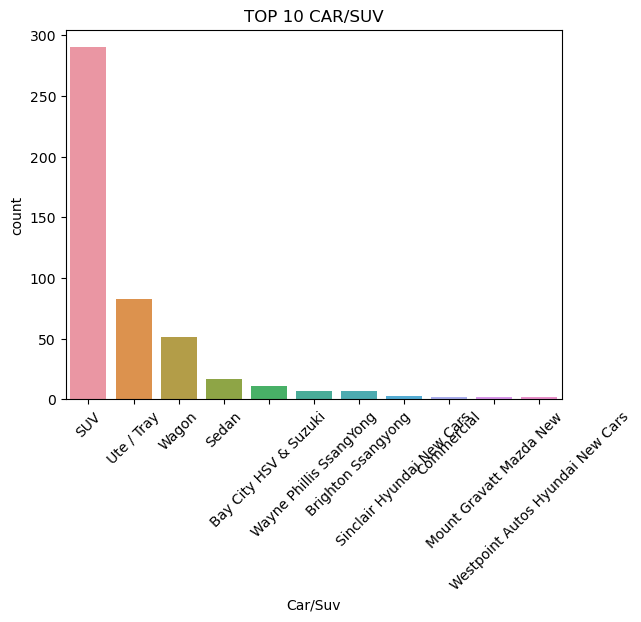

In [53]:
sns.countplot(data=df,x='Car/Suv', 
              order=df['Car/Suv'].value_counts().index[:11]);

plt.title("TOP 10 CAR/SUV")
plt.xticks(rotation=45);

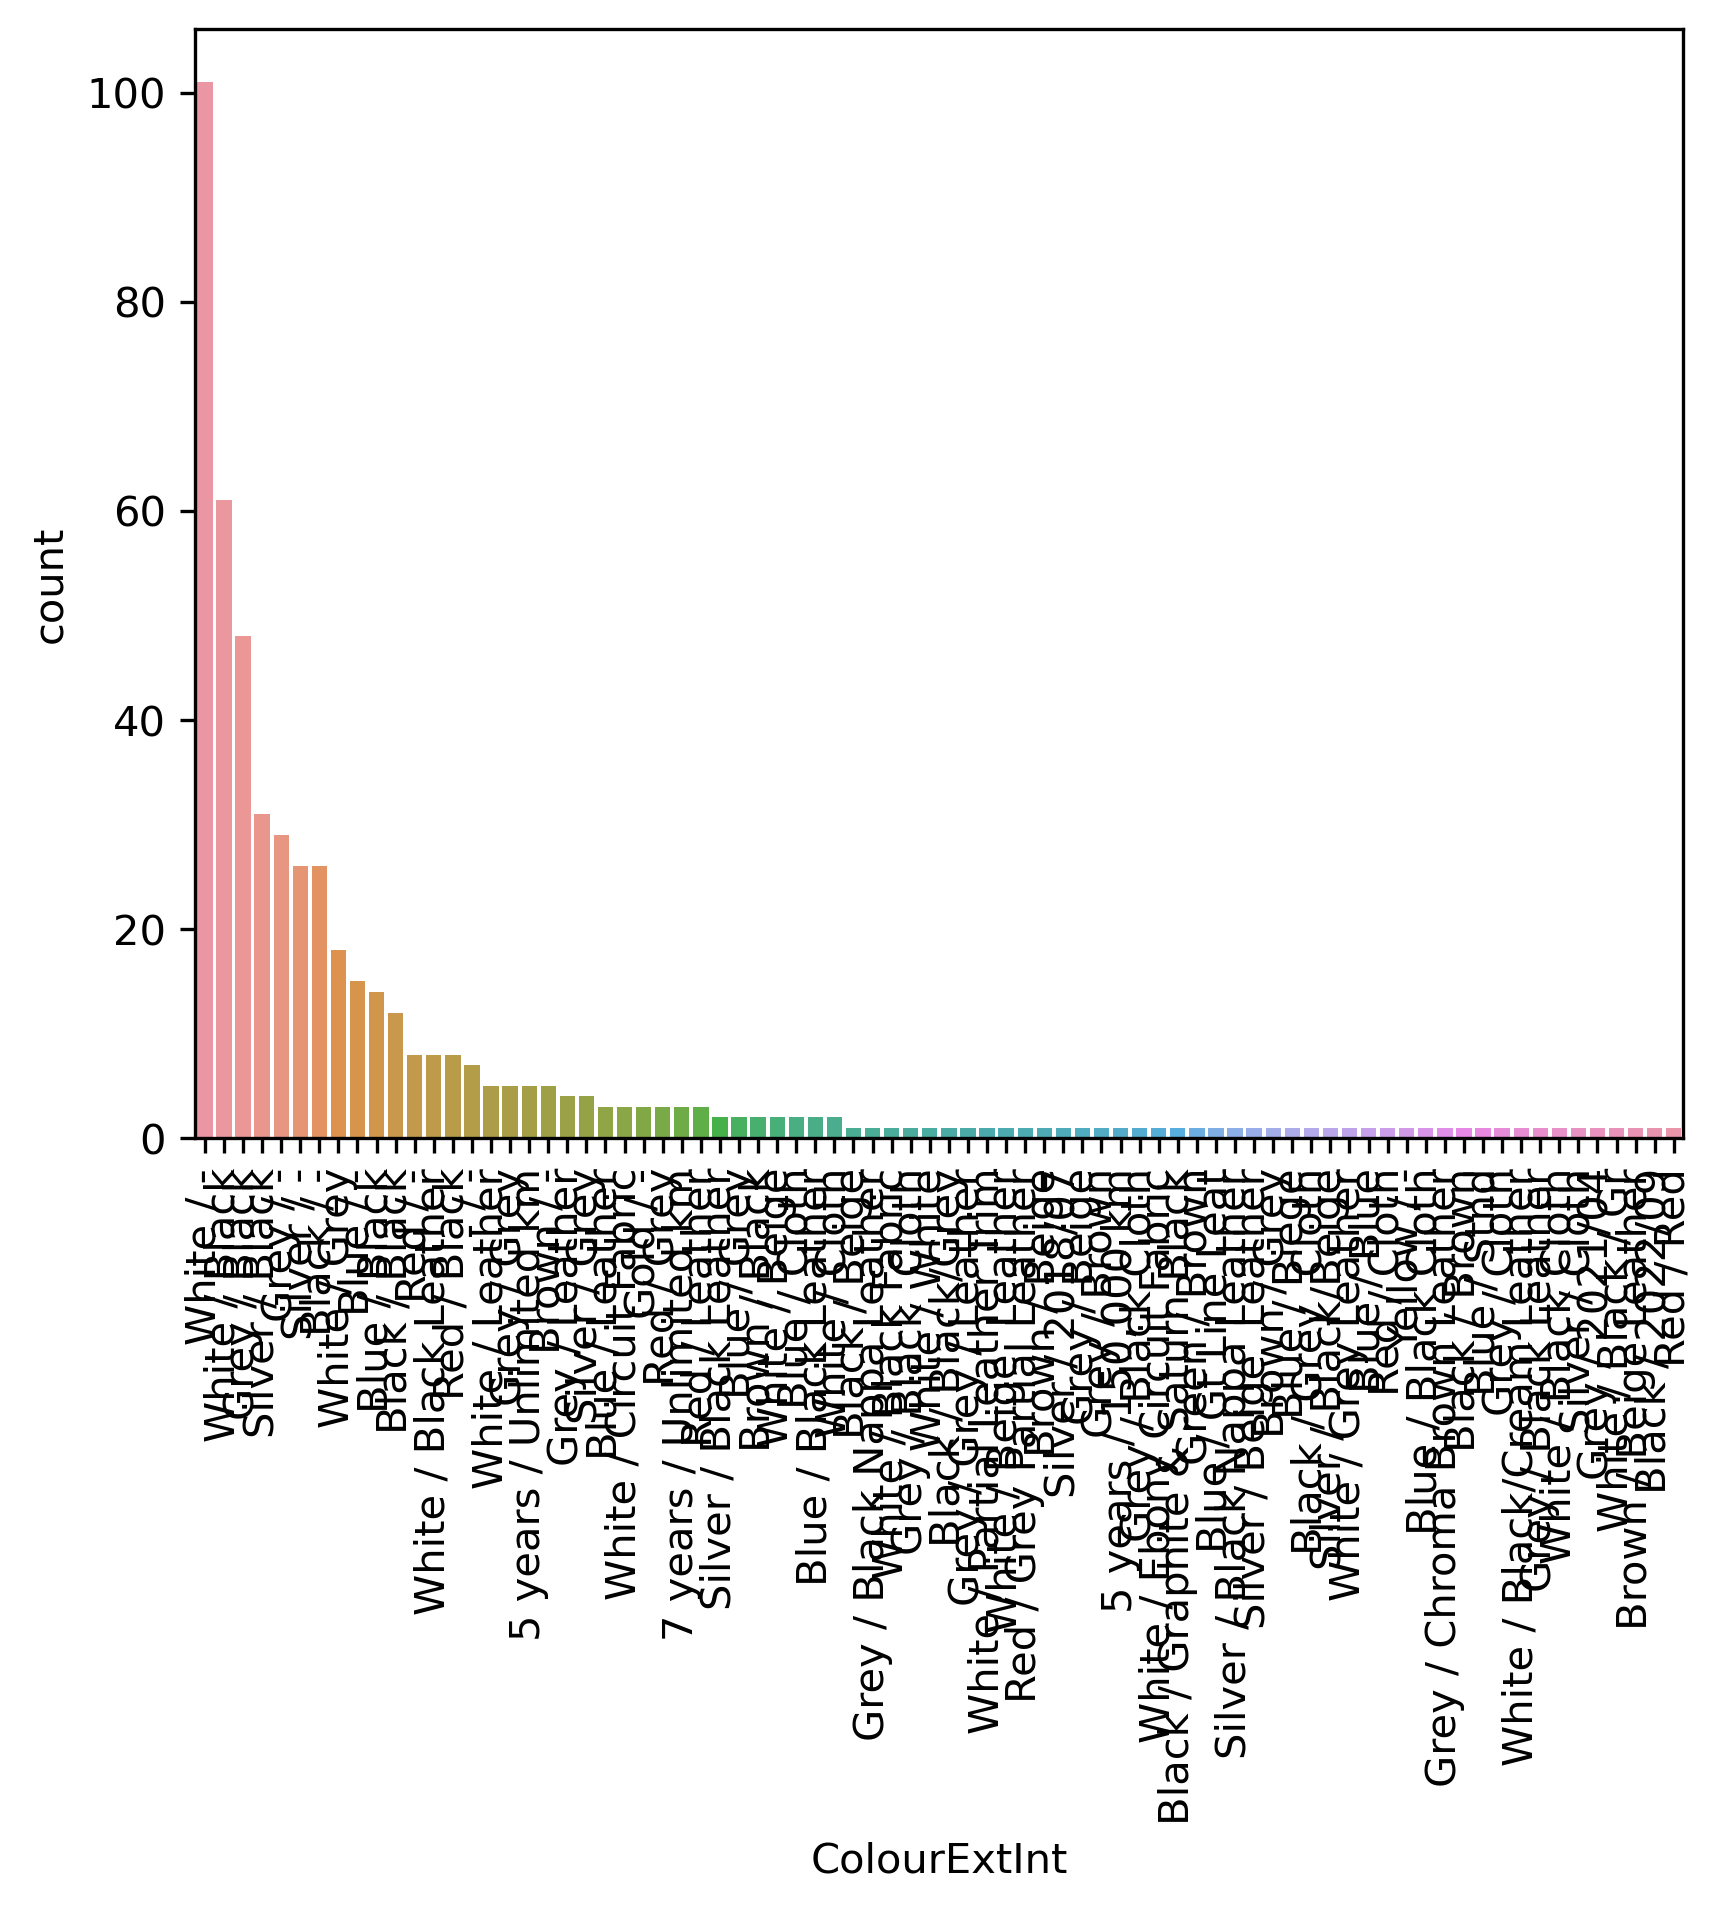

In [54]:
plt.figure(dpi=300)
sns.countplot(data=data,x='ColourExtInt', 
              order=data['ColourExtInt'].value_counts().index);

plt.xticks(rotation=90);

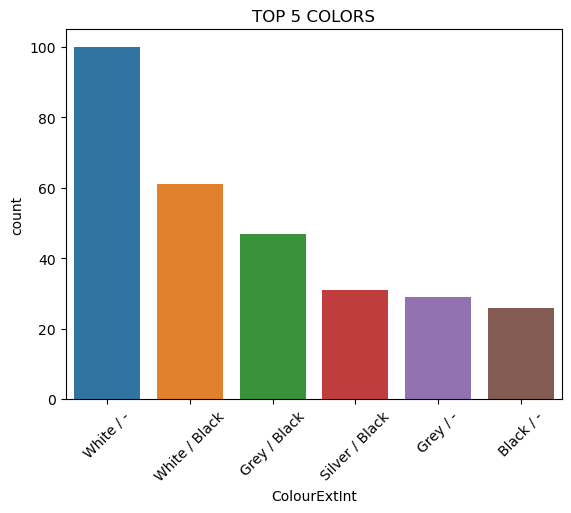

In [55]:
sns.countplot(data=df,x='ColourExtInt', 
              order=df['ColourExtInt'].value_counts().index[:6]);

plt.title("TOP 5 COLORS")
plt.xticks(rotation=45);

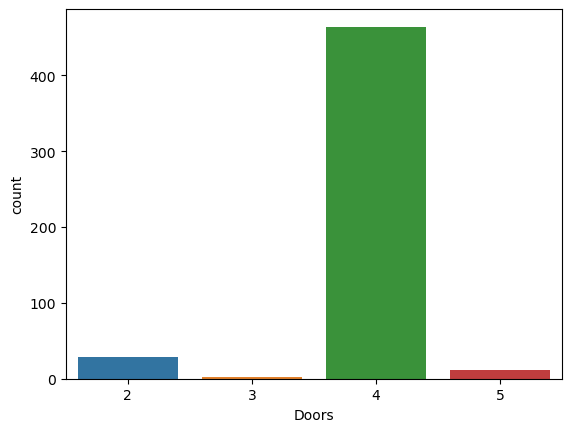

In [56]:
sns.countplot(data=df, x='Doors');

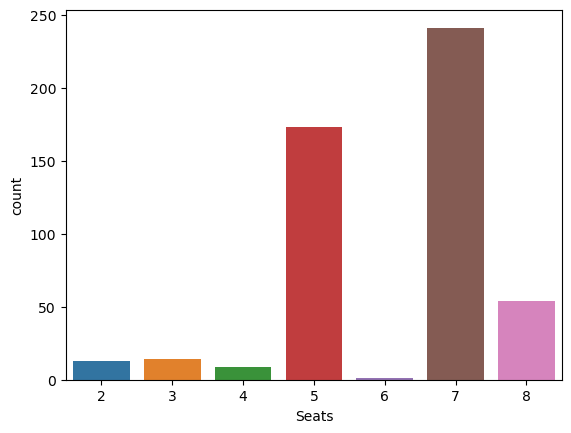

In [57]:
sns.countplot(data=df, x='Seats');

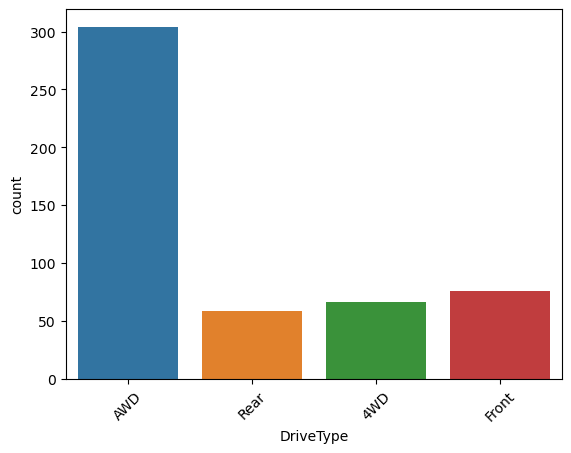

In [58]:
sns.countplot(data=df,x='DriveType')
plt.xticks(rotation=45);

### Bivariate & Multivariate Analysis

#### Average price of different brands & models

In [59]:
mean_brand = np.round(np.exp(df.groupby('Brand')['Price'].mean()))
pd.DataFrame(mean_brand).sort_values('Price', ascending=False)

,Price
Brand,
Ssangyong,45929.0
Hyundai,34775.0
Kia,34066.0
Land,27590.0
Mazda,26966.0
Mahindra,26891.0
Ford,25750.0
Jaguar,21829.0
Honda,18617.0


In [60]:
mean_brand = np.round(np.exp(df.groupby(['Brand', 'Model'])['Price'].mean()))
pd.DataFrame(mean_brand).sort_values('Price', ascending=False)

Price
Brand     Model             
Hyundai   Palisade   72023.0
          Staria     59099.0
Ssangyong Rexton     54591.0
Mazda     CX-8       53165.0
Mahindra  Scorpio-N  51990.0
Ssangyong Musso      42605.0
Kia       Carnival   38639.0
Mahindra  PIK-UP     32210.0
Hyundai   Santa      31871.0
Kia       Sorento    30978.0
Jaguar    XF         29800.0
Land      Rover      27590.0
Mazda     CX-5       26949.0
Ford      Ranger     25785.0
          Transit    24652.0
Toyota    RAV4       24128.0
Peugeot   508        19990.0
Mazda     6          19570.0
Honda     CR-V       18617.0
Mazda     BT-50      18184.0
Tata      Xenon      16990.0
Jaguar    X          15990.0
Holden    Captiva    14675.0
Mahindra  XUV500     13481.0
Alfa      Romeo      12890.0
Mazda     3          12824.0
Great     Wall       11499.0
Peugeot   407         7990.0
Holden    Vectra      5990.0
          Astra       5932.0
Toyota    Camry       5294.0

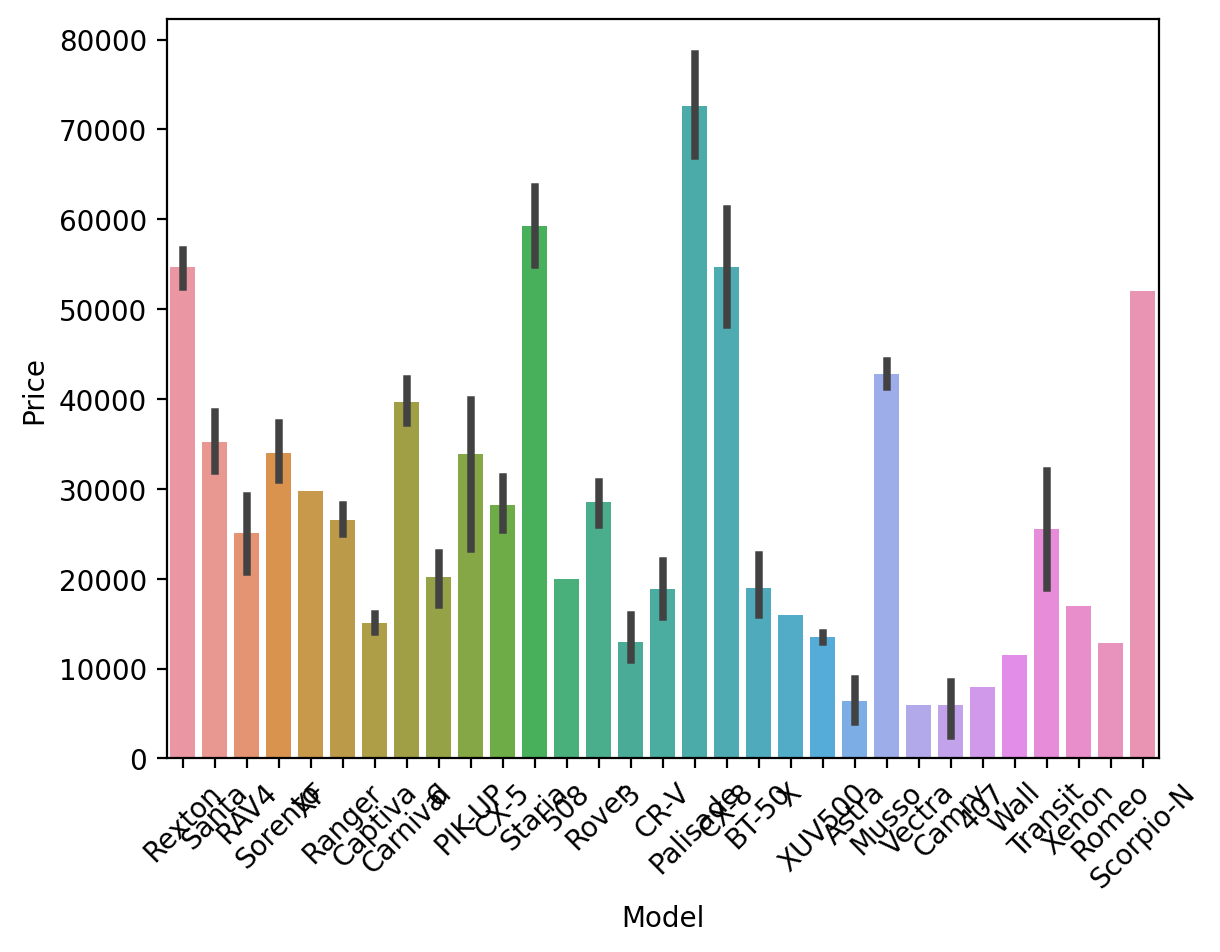

In [61]:
plt.figure(dpi=200)
sns.barplot(data=df, y=np.exp(df["Price"]), x="Model")
plt.xticks(rotation=45)
plt.show()

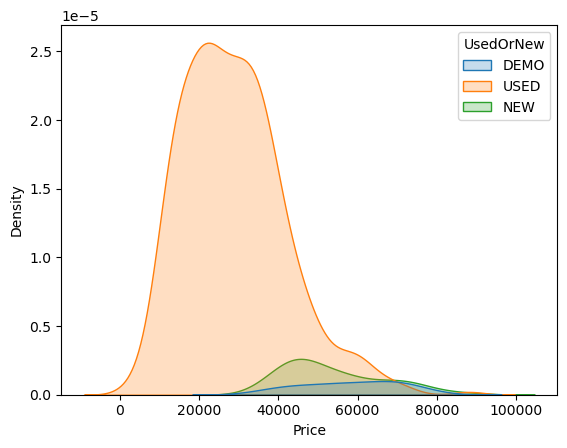

In [62]:
sns.kdeplot(data=df, x=np.exp(df['Price']), hue='UsedOrNew', fill=True);

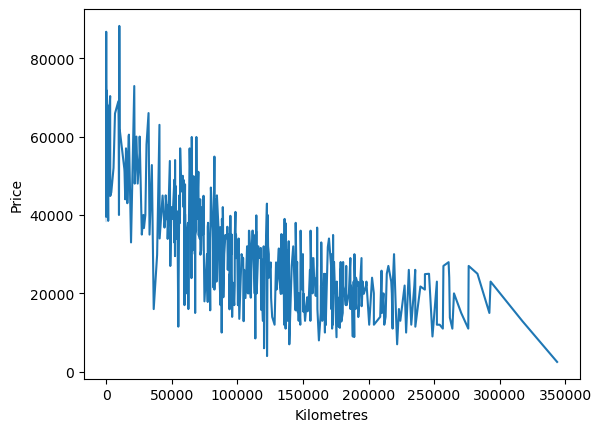

In [63]:
sns.lineplot(x=np.exp(df['Kilometres']), 
                 y=np.exp(df['Price']));

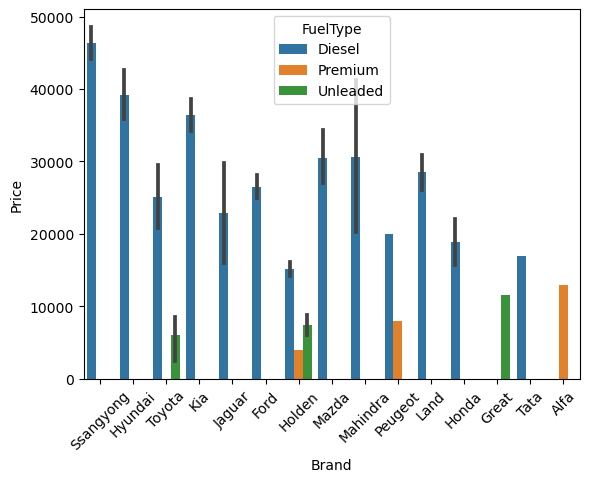

In [64]:
sns.barplot(data=df, 
             y=np.exp(df['Price']), 
                x='Brand',
            hue='FuelType');
plt.xticks(rotation=45)
plt.show()

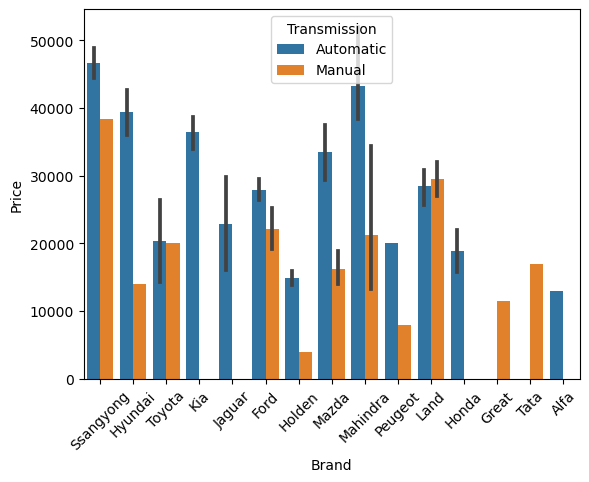

In [65]:
sns.barplot(data=df, 
             y=np.exp(df['Price']), 
                x='Brand', 
            hue='Transmission');
plt.xticks(rotation=45)
plt.show()

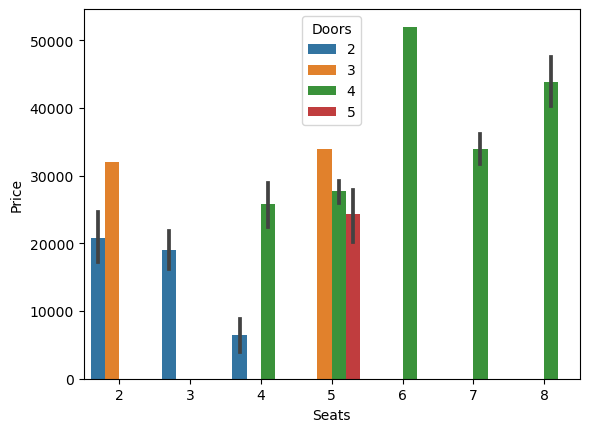

In [66]:
sns.barplot(data=df, 
             y=np.exp(df['Price']), 
                x='Seats', hue='Doors');

In [67]:
mean_brand = np.round(np.exp(df.groupby(['Doors', 'Model'])['Price'].mean()))
pd.DataFrame(mean_brand).sort_values('Doors', ascending=False)

Price
Doors Model             
5     Rover      26353.0
      3          13262.0
4     Sorento    30978.0
      Ranger     27273.0
      Rexton     54591.0
      Romeo      12890.0
      Rover      27924.0
      Santa      31871.0
      Scorpio-N  51990.0
      Staria     59099.0
      Palisade   72023.0
      Vectra      5990.0
      Wall       11499.0
      X          15990.0
      XF         29800.0
      XUV500     13481.0
      RAV4       24128.0
      PIK-UP     32210.0
      508        19990.0
      Carnival   38639.0
      Captiva    14675.0
      Camry       5294.0
      CX-8       53165.0
      CX-5       26949.0
      CR-V       18617.0
      6          19570.0
      Musso      42605.0
      407         7990.0
      3          11990.0
3     Transit    31988.0
      Rover      33990.0
2     Transit    18999.0
      Ranger     20220.0
      BT-50      18184.0
      Xenon      16990.0
      Astra       5932.0

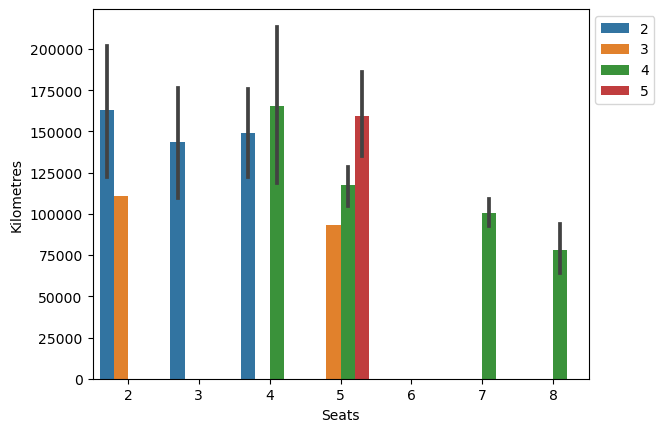

In [68]:
sns.barplot(data=df, 
             y=np.exp(df['Kilometres']), 
                x='Seats', hue='Doors');

plt.legend(loc='best', bbox_to_anchor=(1,1));

## 5. Feature Importance with AdaBoost

In [69]:
X = df.drop(['Price', 'Year'], axis=1)

In [70]:
X = pd.get_dummies(X, drop_first=True)

C:\Users\madhu\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [71]:
y = df['Price']

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
model = AdaBoostRegressor(n_estimators=1)
model.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=1)

In [74]:
predictions = model.predict(X_test)

In [75]:
X.columns[model.feature_importances_.argmax()]

'Kilometres'

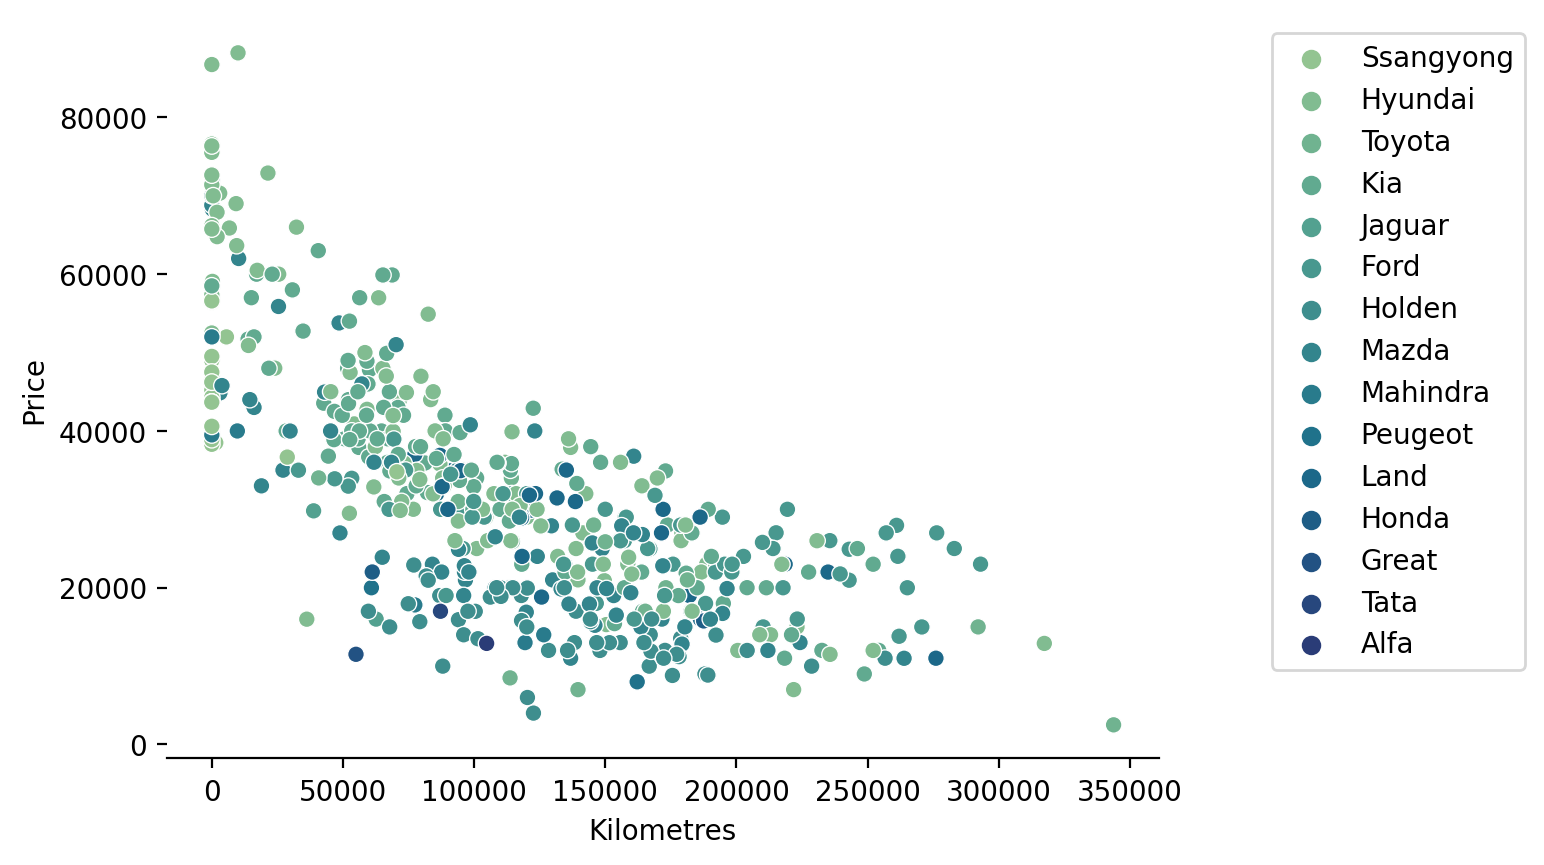

In [76]:
plt.figure(dpi=200)
sns.scatterplot(data=df, x=np.exp(df['Kilometres']), y=np.exp(df['Price']), hue='Brand', palette='crest');
plt.legend(loc='best', bbox_to_anchor=(1.1,1));
sns.despine(left=True)

##### Observation:
This suggests that, among the characteristics we have examined, the most impactful factor on the car's value would be the **Kilometeres**. This deduction is in harmony with our visualizations and data analysis.

### Drop unneccesary features

In [77]:
features_to_drop = ['Title', 'Location']
df = df.drop(features_to_drop, axis=1)

print(df.shape)
df.sample(3)

(505, 17)


,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsump_per_100km,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats,Price
8133,Ford,2015-01-01,Ranger,Ute / Tray,USED,Automatic,4.0,4WD,Diesel,9.0,12.488040,- / -,4.0,Ute / Tray,4,5,9.902987
9800,Hyundai,2018-01-01,Santa,SUV,USED,Automatic,4.0,AWD,Diesel,7.0,11.451082,Silver / -,4.0,SUV,4,7,10.257484
4917,Hyundai,2018-01-01,Santa,SUV,USED,Automatic,4.0,AWD,Diesel,7.0,11.647885,Grey / Black,4.0,SUV,4,7,10.593831


### Feature Encoding

In [78]:
# Import OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [79]:
# Using ordinal encoder for encoding labels
encoder = OrdinalEncoder()
cols = ['Brand',
'Year',
'Model',
'Car/Suv',
'UsedOrNew',
'Transmission',
'Engine',
'DriveType',
'FuelType',
'ColourExtInt',
'BodyType']
# Reassign to our new encoded records
df[cols] = encoder.fit_transform(df[cols])

In [80]:
df.sample(3)

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsump_per_100km,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats,Price
3297,1.0,14.0,16.0,31.0,2.0,0.0,0.0,0.0,0.0,8.0,11.970357,69.0,4.0,5.0,4,5,10.274706
5157,5.0,14.0,20.0,21.0,2.0,0.0,0.0,1.0,0.0,7.0,11.859574,57.0,4.0,3.0,4,7,10.203222
15806,5.0,16.0,20.0,21.0,2.0,0.0,0.0,1.0,0.0,7.0,11.105348,40.0,4.0,3.0,4,7,10.757690


### Independent & Dependent Features

In [81]:
## Independent and Dependent features

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [82]:
X.head(3)

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsump_per_100km,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats
0,12.0,19.0,17.0,26.0,0.0,0.0,0.0,1.0,0.0,8.0,8.629629,60.0,4.0,3.0,4,7
58,5.0,15.0,20.0,21.0,2.0,0.0,0.0,1.0,0.0,7.0,11.179618,60.0,4.0,3.0,4,7
163,14.0,10.0,15.0,21.0,2.0,0.0,0.0,1.0,0.0,6.0,12.584968,33.0,4.0,3.0,4,5


In [83]:
y

0        10.858807
58       10.691922
163       9.615472
208       9.740380
266      10.302264
           ...    
15818    10.412952
15820    10.976782
15845    10.858807
15882    11.097258
15933    10.611154
Name: Price, Length: 505, dtype: float64

### Train-Test Split

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [85]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(353, 16) (353,) (152, 16) (152,)


In [86]:
X_train.sample(3)

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsump_per_100km,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats
6818,1.0,10.0,16.0,31.0,2.0,1.0,0.0,3.0,0.0,7.0,12.145446,57.0,4.0,5.0,4,5
5087,10.0,16.0,5.0,31.0,2.0,0.0,0.0,3.0,0.0,8.0,9.848926,57.0,4.0,5.0,2,3
11702,5.0,16.0,20.0,21.0,2.0,0.0,0.0,1.0,0.0,7.0,11.585804,30.0,4.0,3.0,4,7


In [87]:
y_train

313      10.273325
4337     10.239603
1710     10.038018
736      10.122623
14846    10.731581
           ...    
4115     10.308619
9303      9.046644
11337    10.341420
13854     9.949894
3937     11.050731
Name: Price, Length: 353, dtype: float64

In [88]:
X_test.sample(3)

,Brand,Year,Model,Car/Suv,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsump_per_100km,Kilometres,ColourExtInt,CylindersinEngine,BodyType,Doors,Seats
10658,7.0,18.0,11.0,32.0,2.0,0.0,0.0,2.0,0.0,6.0,9.536257,60.0,4.0,6.0,4,8
1209,5.0,18.0,23.0,32.0,2.0,0.0,0.0,1.0,0.0,8.0,11.320602,30.0,4.0,6.0,4,8
5438,10.0,14.0,7.0,21.0,2.0,0.0,0.0,1.0,0.0,6.0,11.910459,30.0,4.0,3.0,4,5


In [89]:
y_test

6106      9.667765
9372     10.596385
15505    11.193202
2741     10.043032
10300    10.751178
           ...    
14031    10.404081
1204      9.951801
7840      9.350015
13748    10.239603
14218     9.509556
Name: Price, Length: 152, dtype: float64

### Standardize the Data

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [91]:
X_train=scaler.fit_transform(X_train)

In [92]:
X_test=scaler.transform(X_test)

In [93]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [94]:
print(X_train.shape)
X_train

(353, 16)


array([[ 0.15749023,  0.40483883,  1.23709094, ..., -0.64944403,
         0.20894789,  0.63360831],
       [ 0.15749023, -0.35801583, -0.61116767, ...,  1.90728916,
         0.20894789,  1.33038005],
       [-0.43709855, -1.1208705 ,  0.90104392, ..., -0.64944403,
         0.20894789,  0.63360831],
       ...,
       [ 0.15749023, -0.10373095,  1.23709094, ..., -0.64944403,
         0.20894789,  0.63360831],
       [-1.6262761 ,  0.40483883,  0.22894988, ...,  1.05504476,
         0.20894789, -0.75993519],
       [ 0.15749023,  0.91340861, -0.61116767, ...,  1.90728916,
         0.20894789,  1.33038005]])

In [95]:
y_train

313      10.273325
4337     10.239603
1710     10.038018
736      10.122623
14846    10.731581
           ...    
4115     10.308619
9303      9.046644
11337    10.341420
13854     9.949894
3937     11.050731
Name: Price, Length: 353, dtype: float64

In [96]:
print(X_test.shape)
X_test

(152, 16)


array([[-1.03168732, -0.10373095, -0.77919118, ..., -0.64944403,
         0.20894789,  0.63360831],
       [ 0.752079  ,  1.1676935 , -0.27512065, ...,  1.05504476,
         0.20894789, -0.75993519],
       [-0.43709855,  1.42197838,  0.90104392, ..., -0.64944403,
         0.20894789,  0.63360831],
       ...,
       [-1.03168732, -1.37515539, -0.77919118, ..., -0.64944403,
         0.20894789,  0.63360831],
       [ 2.23855094,  0.40483883,  0.06092637, ..., -0.64944403,
         0.20894789, -0.75993519],
       [-1.03168732, -0.86658561, -0.77919118, ..., -0.64944403,
         0.20894789, -0.75993519]])

In [97]:
y_test

6106      9.667765
9372     10.596385
15505    11.193202
2741     10.043032
10300    10.751178
           ...    
14031    10.404081
1204      9.951801
7840      9.350015
13748    10.239603
14218     9.509556
Name: Price, Length: 152, dtype: float64

## 6. Model Training

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
regression=LinearRegression()

In [100]:
regression.fit(X_train,y_train)

LinearRegression()

In [101]:
## print the coefficients and the intercept
print(regression.coef_)

[ 1.67940015e-02  4.16660736e-01  1.15031978e-01  1.30452047e-02
  1.26008744e-02 -2.99115639e-03 -1.38777878e-16  1.27759005e-02
  9.09185570e-03 -8.85122487e-02 -2.78828111e-02  2.82552281e-03
  0.00000000e+00  3.11672217e-02  1.55378683e-02  4.37403563e-02]


In [102]:
print(regression.intercept_)

10.21940447093913


In [103]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [104]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [105]:
reg_pred

array([ 9.97310532, 10.60749677, 10.9830028 ,  9.9587713 , 10.79925119,
       10.86566891, 10.13970917, 11.13118037, 11.04571974, 10.83634796,
       10.52781495, 10.88730629, 11.15696408, 10.86470441, 10.82247996,
       10.98982494, 10.2057316 , 10.53273614, 10.31391728,  9.81784866,
        9.55727968,  9.65939833,  9.64496652, 10.41207682,  9.91195598,
       10.57054652, 10.07264667,  9.49027814, 10.27057276, 10.47697045,
        9.87464305, 10.45271642, 11.00221467, 10.79572199, 10.20100501,
       10.16219116,  9.90671084, 10.92560088,  9.72288206,  9.67056118,
        9.20679918, 10.41502309,  9.72538631, 10.53101797,  9.88510263,
       10.06203282, 10.28036243, 10.67990548,  9.87006077, 10.78106467,
       10.31627327, 10.25000842, 10.47920858, 10.76898725, 10.05595779,
       10.82921756, 10.32828627, 10.89131902, 10.03890176, 10.28717615,
        9.94372346,  9.76347765, 10.48291074, 10.0522973 , 11.04627431,
        9.71342821, 10.19781871, 10.07081237, 10.08722786,  9.65

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.15834402729733443
0.042579125635406764
0.20634709989579877


## 7. R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [107]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.8343031406110648


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [108]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.8146649943131169

## 8. Model Building & Predictions

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error
import numpy as np

# Assuming you have your dataset loaded and split into X_train, X_test, y_train, y_test
# If not, you can use train_test_split to split your dataset into training and testing sets.

# Example data loading
# X, y = load_data()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]

# Iterate through the models
for model in models:
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    explained_var = explained_variance_score(y_test, predictions)
    max_err = max_error(y_test, predictions)

    # Print the results
    print(f"\n{model.__class__.__name__} MSE: {mse}")
    print(f"{model.__class__.__name__} RMSE: {rmse}")
    print(f"{model.__class__.__name__} MAE: {mae}")
    print(f"{model.__class__.__name__} R-squared: {r2}")
    print(f"{model.__class__.__name__} Explained Variance: {explained_var}")
    print(f"{model.__class__.__name__} Max Error: {max_err}")



LinearRegression MSE: 0.042579125635406764
LinearRegression RMSE: 0.20634709989579877
LinearRegression MAE: 0.15834402729733443
LinearRegression R-squared: 0.8343031406110648
LinearRegression Explained Variance: 0.8345000926134117
LinearRegression Max Error: 0.7803043699804171

Ridge MSE: 0.04256288953638985
Ridge RMSE: 0.20630775442622085
Ridge MAE: 0.15812125113751951
Ridge R-squared: 0.8343663234635937
Ridge Explained Variance: 0.8345373757294746
Ridge Max Error: 0.7825924418195243

Lasso MSE: 0.26458632154612
Lasso RMSE: 0.5143795500854598
Lasso MAE: 0.4262608523541845
Lasso R-squared: -0.029638863251030267
Lasso Explained Variance: 4.440892098500626e-16
Lasso Max Error: 1.1682411776043402

DecisionTreeRegressor MSE: 0.03934592331402931
DecisionTreeRegressor RMSE: 0.19835806843692874
DecisionTreeRegressor MAE: 0.1495759044302994
DecisionTreeRegressor R-squared: 0.8468851620224151
DecisionTreeRegressor Explained Variance: 0.847168503307892
DecisionTreeRegressor Max Error: 0.6707978

## 9. Hyper-parameter Tunning the Models

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error
import numpy as np

# Assuming you have your dataset loaded and split into X_train, X_test, y_train, y_test
# If not, you can use train_test_split to split your dataset into training and testing sets.

# Example data loading
# X, y = load_data()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models and their respective hyperparameter grids
models = [
    {
        'name': 'Linear Regression',
        'model': LinearRegression(),
        'param_grid': {}
    },
    {
        'name': 'Ridge Regression',
        'model': Ridge(),
        'param_grid': {'alpha': [0.1, 1, 10]}
    },
    {
        'name': 'Lasso Regression',
        'model': Lasso(),
        'param_grid': {'alpha': [0.1, 1, 10]}
    },
    {
        'name': 'Decision Tree Regression',
        'model': DecisionTreeRegressor(),
        'param_grid': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
    },
    {
        'name': 'Random Forest Regression',
        'model': RandomForestRegressor(),
        'param_grid': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
    }
]

best_model = None
best_metrics = None
best_model_name = None

# Iterate through the models
for model_info in models:
    model_name = model_info['name']
    model = model_info['model']
    param_grid = model_info['param_grid']

    # Create the GridSearchCV object with reduced verbosity
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                               scoring='neg_mean_squared_error', cv=5, verbose=1)

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters from the grid search
    best_params = grid_search.best_params_

    # Use the best model for predictions
    best_model_instance = grid_search.best_estimator_
    best_predictions = best_model_instance.predict(X_test)

    # Evaluate the best model
    mse = mean_squared_error(y_test, best_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, best_predictions)
    r2 = r2_score(y_test, best_predictions)
    explained_var = explained_variance_score(y_test, best_predictions)
    max_err = max_error(y_test, best_predictions)

    # Print the results for the best model
    print(f"\nBest {model_name} Hyperparameters: {best_params}")
    print(f"Best {model_name} MSE: {mse}")
    print(f"Best {model_name} RMSE: {rmse}")
    print(f"Best {model_name} MAE: {mae}")
    print(f"Best {model_name} R-squared: {r2}")
    print(f"Best {model_name} Explained Variance: {explained_var}")
    print(f"Best {model_name} Max Error: {max_err}")

    # Check if this model is the best so far
    if best_model is None or mse < best_metrics['mse']:
        best_model = best_model_instance
        best_metrics = {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2, 'explained_var': explained_var, 'max_err': max_err}
        best_model_name = model_name

# Print the results for the overall best model
print("\nBest Model Overall:", best_model_name)
print(f"Best Model Overall Hyperparameters: {best_model.get_params()}")
print(f"Best Model Overall MSE: {best_metrics['mse']}")
print(f"Best Model Overall RMSE: {best_metrics['rmse']}")
print(f"Best Model Overall MAE: {best_metrics['mae']}")
print(f"Best Model Overall R-squared: {best_metrics['r2']}")
print(f"Best Model Overall Explained Variance: {best_metrics['explained_var']}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best Linear Regression Hyperparameters: {}
Best Linear Regression MSE: 0.042579125635406764
Best Linear Regression RMSE: 0.20634709989579877
Best Linear Regression MAE: 0.15834402729733443
Best Linear Regression R-squared: 0.8343031406110648
Best Linear Regression Explained Variance: 0.8345000926134117
Best Linear Regression Max Error: 0.7803043699804171
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Ridge Regression Hyperparameters: {'alpha': 10}
Best Ridge Regression MSE: 0.04275850758644749
Best Ridge Regression RMSE: 0.20678130376426077
Best Ridge Regression MAE: 0.15690947969719837
Best Ridge Regression R-squared: 0.833605074939801
Best Ridge Regression Explained Variance: 0.8336320732084941
Best Ridge Regression Max Error: 0.8011011564655721
Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Lasso Regression Hyperparameters: {'alpha': 0.1}
Best Lasso Regression MSE: 0.07720892276591008
B

## 10. Pickling The Model file For Deployment

In [111]:
import pickle

In [112]:
# Assuming best_model is your trained Random Forest model
# You can replace "best_model" with the variable name you used to store your trained Random Forest model

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved to model.pkl")


Model saved to model.pkl


**END OF DOCUMENT**